In [1]:
import os 
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math
import sys
sys.path.append('../')
from utils import visualize_data_sample
from sklearn.utils import shuffle
from keras.api.models import Model
from keras.api.layers import Dense, Conv2D, BatchNormalization, LeakyReLU, Flatten, Softmax, Activation, MaxPool2D, Input, Dropout
from keras.api.optimizers import Adam
from keras.api.losses import binary_crossentropy


In [2]:
x_data = np.load('../datasets/tp4/pipeline_images.npy')
y_data = np.load('../datasets/tp4/pipeline_predections.npy')

In [3]:
print(f'x_data shape : {x_data.shape}')
print(f'y_data shape : {y_data.shape}')

x_data shape : (1112, 228, 308, 3)
y_data shape : (1112, 4)


In [4]:
def preprocess(x_data):
    gray_images = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in x_data])
    gray_images = gray_images.astype('float32') / 255.0
    gray_images = np.expand_dims(gray_images, -1)
    
    return gray_images

In [5]:
x_data = preprocess(x_data)

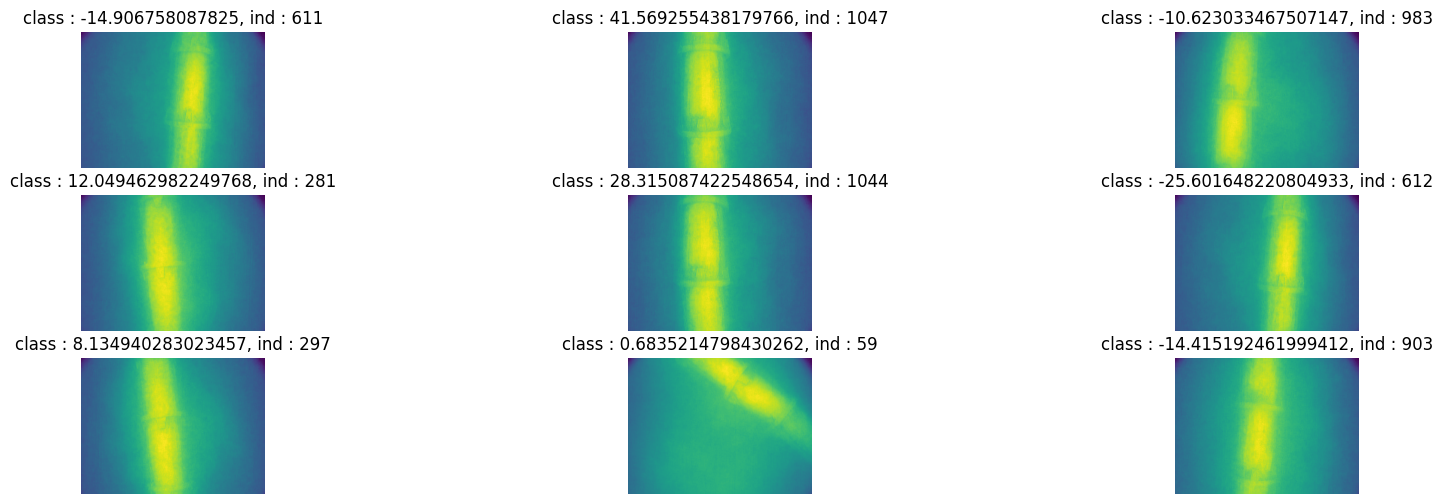

In [6]:
visualize_data_sample(x=x_data, y=y_data[:, 0], random=True)

In [7]:
y_data = y_data[:, 0:2]
y_data[:, 0] = np.abs(y_data[:, 0])

In [8]:
x_data, y_data = shuffle(x_data, y_data)

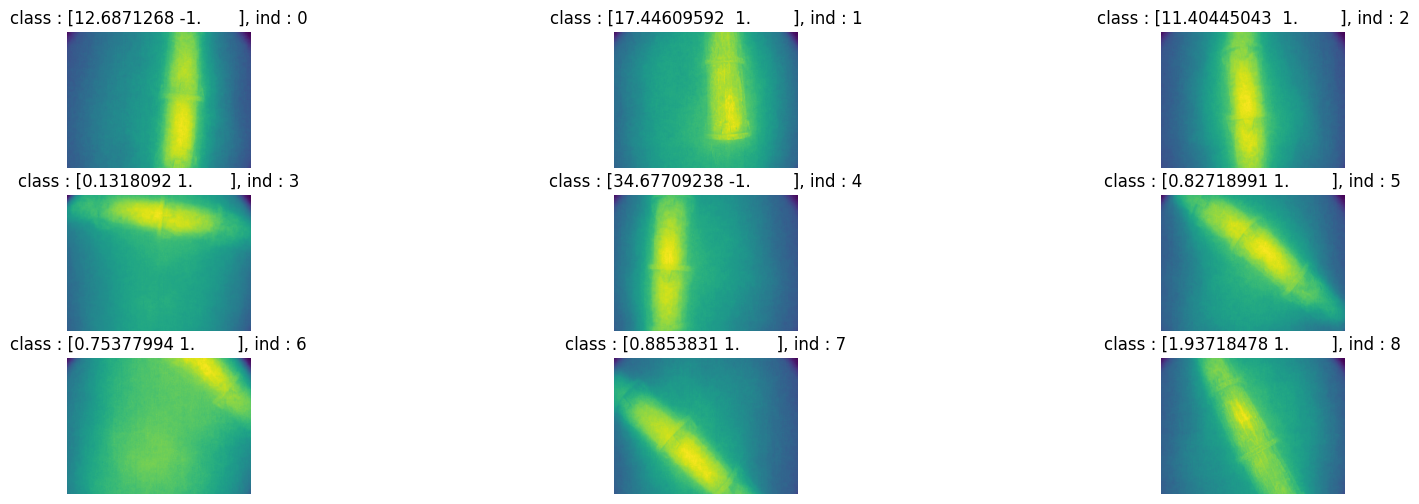

In [9]:
visualize_data_sample(x_data, y_data, random=False)

In [10]:
def print_angle_value(tan):
    print(f'rad value : {math.atan(tan)}')
    print(f'deg value : {math.degrees(math.atan(tan))}')

In [11]:
train_part = 0.8

In [12]:
y_angle = y_data[:, 0]
y_sign = y_data[:, 1]

In [21]:
x_train = x_data[:int(train_part*x_data.shape[0])]
x_test = x_data[int(train_part*x_data.shape[0]):]
y_train_sign = (y_sign[:int(train_part*y_sign.shape[0])].reshape((-1,1)) > 0).astype(int)
y_test_sign = (y_sign[int(train_part*y_sign.shape[0]):].reshape((-1,1)) > 0).astype(int)
y_train_angle = (y_angle[:int(train_part*y_angle.shape[0])].reshape((-1,1))).astype(np.float32)
y_test_angle = (y_angle[int(train_part*y_angle.shape[0]):].reshape((-1,1))).astype(np.float32)

In [22]:
y_test_sign.shape
print(y_train_angle)

[[1.26871271e+01]
 [1.74460964e+01]
 [1.14044504e+01]
 [1.31809205e-01]
 [3.46770935e+01]
 [8.27189922e-01]
 [7.53779948e-01]
 [8.85383129e-01]
 [1.93718481e+00]
 [4.16412354e+02]
 [9.77212906e+00]
 [8.74062061e-01]
 [6.30413551e+01]
 [1.94239502e+01]
 [1.04521549e+00]
 [1.45331131e+02]
 [1.99051723e+01]
 [2.21226978e+00]
 [8.20167465e+01]
 [1.97732620e+01]
 [2.55427074e+01]
 [1.14919540e+02]
 [9.69018936e+01]
 [2.52011948e+01]
 [8.68960571e+00]
 [5.42281985e-01]
 [6.38045197e+01]
 [1.84781532e+01]
 [6.32682025e-01]
 [4.75297308e+00]
 [2.47404613e+01]
 [8.08540225e-01]
 [1.78452950e+01]
 [2.64286423e+01]
 [4.49196930e+01]
 [6.64836788e+00]
 [2.57092190e+01]
 [2.87887993e+01]
 [1.67760334e+01]
 [3.51936646e+01]
 [2.35048943e+01]
 [6.03715897e+01]
 [1.95685959e+01]
 [2.70226955e+01]
 [4.96205330e+01]
 [1.40588236e+01]
 [2.27166252e+01]
 [7.60530167e+01]
 [3.29900513e+01]
 [1.16401529e+01]
 [1.98500900e+01]
 [1.28146257e+01]
 [6.88617051e-01]
 [1.95914707e+01]
 [1.12135496e+01]
 [7.292692

In [15]:
input = Input((228, 308, 1))

x = Conv2D(filters=8, kernel_size=3, strides=1)(input)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPool2D()(x)

x = Conv2D(filters=16, kernel_size=3, strides=2)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPool2D()(x)

x = Flatten()(x)

x = Dense(16)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

out1 = Dense(1, activation='sigmoid')(x)
out2 = Dense(1)(x)

model = Model(input, [out1, out2])

In [31]:
model.summary()
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='mse', metrics=['mse', 'accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 228, 308,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 226, 306,  │         80 │ input_layer[0][0] │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 226, 306,  │         32 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 226, 306,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 113, 153,  │          0 │ leaky_re_lu[0][0] │
│ (MaxPooling2D)      │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 76,    │      1,168 │ max_pooling2d[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 76,    │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 56, 76,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 28, 38,    │          0 │ leaky_re_lu_1[0]… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 17024)     │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 16)        │    272,400 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16)        │         64 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 16)        │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 16)        │          0 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         17 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         17 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 821,368 (3.13 MB)

 Trainable params: 273,762 (1.04 MB)

 Non-trainable params: 80 (320.00 B)

 Optimizer params: 547,526 (2.09 MB)

In [32]:
model.fit(x_train, [y_train_angle, y_train_sign], batch_size=16, epochs=15)

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - dense_1_loss: 211449.0781 - dense_1_mse: 211488.2188 - dense_2_accuracy: 0.5031 - dense_2_loss: 1.4320 - loss: 211489.6562
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - dense_1_loss: 169506.7344 - dense_1_mse: 169545.1562 - dense_2_accuracy: 0.4711 - dense_2_loss: 1.4444 - loss: 169546.6250
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - dense_1_loss: 46387.8320 - dense_1_mse: 46426.7227 - dense_2_accuracy: 0.4830 - dense_2_loss: 1.1129 - loss: 46427.8359
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - dense_1_loss: 87212.2891 - dense_1_mse: 87248.2109 - dense_2_accuracy: 0.5433 - dense_2_loss: 1.0201 - loss: 87249.2344
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - dense_1_loss: 145320.0938 - dense_1_mse: 145358.8594 - dense_2_accuracy: 0.4682 - dense_2_loss: 1.0999 - loss: 145359.9531
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - dense_1_loss: 106484.7031 - dense_1_mse: 106523.7031 - dense_2_accuracy: 

In [57]:
print(y_train_sign)

[[ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]